
importing libraries
---



In [2]:
!pip install Keras-Preprocessing
import numpy as np
import pandas as pd
import nltk
import tensorflow as tf
from nltk.corpus import stopwords
from nltk.corpus import reuters
from nltk.corpus import brown
from nltk.corpus import gutenberg
from nltk.tokenize import RegexpTokenizer
from nltk.stem import SnowballStemmer
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import pickle
import joblib
from collections import Counter
from textblob import Word
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC, SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier, AdaBoostClassifier, VotingClassifier
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, f1_score, recall_score
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from keras.preprocessing.text import Tokenizer
from keras.models import Sequential, load_model
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from keras_preprocessing.sequence import pad_sequences
!pip install np_utils
from keras.utils import to_categorical
from keras.layers import Activation, Dense, Embedding, LSTM, SpatialDropout1D, Dropout, Flatten, GRU, Conv1D, MaxPooling1D, Bidirectional
from wordcloud import WordCloud,ImageColorGenerator
from PIL import Image
import urllib
import requests
import re
!pip install ktrain
import ktrain
from ktrain import text
import re
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk import word_tokenize
from matplotlib import pyplot as plt
import pandas as pd
!pip install word2number
!pip install w2n
sns.set()
%matplotlib inline
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('gutenberg')
nltk.download('brown')
nltk.download("reuters")
nltk.download('words')

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 933.2 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 1.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for np_utils: filename=np_utils-0.6.0-py3-none-any.whl size=56438 sha256=54c73f260bba079b757fc6ba8cff9a1a9378805e82aef7e29148551d78cd09e5
  Stored in directory: /root/.cache/pip/wheels/b6/c7/50/2307607f44366dd021209f660045f8d51cb976514d30be7cc7
Successfully built np_utils
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 25.3/25.3 MB 37.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 44.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 653.6/653.6 kB 46.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 96.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package gutenberg to /root/nltk_data...
[nltk_data]   Unzipping corpora/gutenberg.zip.
[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Unzipping corpora/brown.zip.
[nltk_data] Downloading package reuters to /root/nltk_data...
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.


True

Loading dataset

In [3]:
from google.colab import files
uploaded = files.upload()

Saving raw_data.csv to raw_data.csv


reading dataset and printing the column names in it

In [4]:
df=pd.read_csv("raw_data.csv", engine='python', encoding='UTF-8')
print(df.columns)

Index(['Unnamed: 0', 'Description of the Grievance', 'Unnamed: 2',
       'Grievance Category'],
      dtype='object')


count of values in each column of dataset

In [6]:
df['Unnamed: 0'].value_counts()

Not Satisfied With Provider Services                                                                                                                                                           81
Other                                                                                                                                                                                          80
Specialist                                                                                                                                                                                     72
Pcp                                                                                                                                                                                            45
Not Satisfied With Vendor Services                                                                                                                                                             38
                              

In [7]:
df['Description of the Grievance'].value_counts()

Dissatisfaction                                                                                        4
dissatisfaction                                                                                        2
 Member states that he was unhappy to hear the claim was filed.                                        2
Member                                                                                                 2
 2024 to access care with her Primary Care Provider, Dr. Mark Jabro.                                   1
                                                                                                      ..
 with Supercare availability of portable oxygen tanks for distribution.                                1
 at optical office only to find out they are out of network for his plan.                              1
 her membership a month earlier than what she had requested.                                           1
 Medical Group not faxing laboratory results to his psy

In [8]:
df['Unnamed: 2'].value_counts()

Quality Of Service                                                   78
Quality Of Care                                                      57
Billing/Financial Dispute                                            27
Access And Availability                                              26
Benefit Package                                                      12
                                                                     ..
Dissatisfaction with the quality of services rendered by MindPath     1
 services rendered by Dr. Alborz Hassankhani in January 2022.         1
 with the availability of lab documents on Follow My Health.          1
Dissatisfaction with the automatic refill of his medications.         1
 her they could not give her the vaccine without any explanation.     1
Name: Unnamed: 2, Length: 138, dtype: int64

In [9]:
df['Grievance Category'].value_counts()

Quality Of Service           82
Quality Of Care              79
Access And Availability      75
Billing/Financial Dispute    33
Benefit Package              24
Enrollment/Disenrollment      2
Marketing                     2
Confidentiality/Privacy       1
Name: Grievance Category, dtype: int64

Data Cleaning

In [10]:
if 'Unnamed: 0' in df.columns:
    # Fill NaN values in the 'Unnamed: 0' column with an empty string
    df['Unnamed: 0'] = df['Unnamed: 0'].fillna("")
    # Check for NaN values in the DataFrame
    nan_count = df.isna().sum()
    print(nan_count)

Unnamed: 0                        0
Description of the Grievance    640
Unnamed: 2                      689
Grievance Category              730
dtype: int64


In [11]:
df['Unnamed: 0']=df['Unnamed: 0'].fillna("")
df.isna().sum()
df['Description of the Grievance']=df['Description of the Grievance'].fillna("")
df.isna().sum()
df['Unnamed: 2']=df['Unnamed: 2'].fillna("")
df.isna().sum()
df['Grievance Category']=df['Grievance Category'].fillna("")
df.isna().sum()



Unnamed: 0                      0
Description of the Grievance    0
Unnamed: 2                      0
Grievance Category              0
dtype: int64

PREPROCESSING OF THE 4 COLUMNS:

In [12]:

from word2number import w2n

# Convert the  column to lowercase, strip spaces, and replace newline and carriage return characters
df['lower_case_1'] = df['Unnamed: 0'].apply(lambda x: x.lower().strip().replace('\n', ' ').replace('\r', ' '))
df['lower_case_2'] = df['Description of the Grievance'].apply(lambda x: x.lower().strip().replace('\n', ' ').replace('\r', ' '))
df['lower_case_3'] = df['Unnamed: 2'].apply(lambda x: x.lower().strip().replace('\n', ' ').replace('\r', ' '))
df['lower_case_4'] = df['Grievance Category'].apply(lambda x: x.lower().strip().replace('\n', ' ').replace('\r', ' '))


# Remove non-alphabetic characters and non-ASCII characters
df['alphabetic_1'] = df['lower_case_1'].apply(lambda x: re.sub(r'[^a-zA-Z\']', ' ', x)).apply(lambda x: re.sub(r'[^\x00-\x7F]+', '', x))
df['alphabetic_2'] = df['lower_case_2'].apply(lambda x: re.sub(r'[^a-zA-Z\']', ' ', x)).apply(lambda x: re.sub(r'[^\x00-\x7F]+', '', x))
df['alphabetic_3'] = df['lower_case_3'].apply(lambda x: re.sub(r'[^a-zA-Z\']', ' ', x)).apply(lambda x: re.sub(r'[^\x00-\x7F]+', '', x))
df['alphabetic_4'] = df['lower_case_4'].apply(lambda x: re.sub(r'[^a-zA-Z\']', ' ', x)).apply(lambda x: re.sub(r'[^\x00-\x7F]+', '', x))

# Remove URLs
df['without-link_1'] = df['alphabetic_1'].apply(lambda x: re.sub(r'http\S+', '', x))
df['without-link_2'] = df['alphabetic_2'].apply(lambda x: re.sub(r'http\S+', '', x))
df['without-link_3'] = df['alphabetic_3'].apply(lambda x: re.sub(r'http\S+', '', x))
df['without-link_4'] = df['alphabetic_4'].apply(lambda x: re.sub(r'http\S+', '', x))

# Tokenize the 'lower_case' column using a regular expression tokenizer
tokenizer = RegexpTokenizer(r'\w+')
df['Special_word_1'] = df.apply(lambda row: tokenizer.tokenize(row['lower_case_1']), axis=1)
df['Special_word_2'] = df.apply(lambda row: tokenizer.tokenize(row['lower_case_2']), axis=1)
df['Special_word_3'] = df.apply(lambda row: tokenizer.tokenize(row['lower_case_3']), axis=1)
df['Special_word_4'] = df.apply(lambda row: tokenizer.tokenize(row['lower_case_4']), axis=1)


# Define a list of stopwords to be excluded
stop = [word for word in stopwords.words('english') if word not in ["my", "haven't", "aren't", "can", "no", "why", "through", "herself", "she", "he", "himself", "you", "you're", "myself", "not", "here", "some", "do", "does", "did", "will", "don't", "doesn't", "didn't", "won't", "should", "should've", "couldn't", "mightn't", "mustn't", "shouldn't", "hadn't", "wasn't", "wouldn't"]]

# Remove stopwords from the 'Special_word' column
df['stop_words_1'] = df['Special_word_1'].apply(lambda x: [item for item in x if item not in stop])
df['stop_words_2'] = df['Special_word_2'].apply(lambda x: [item for item in x if item not in stop])
df['stop_words_3'] = df['Special_word_3'].apply(lambda x: [item for item in x if item not in stop])
df['stop_words_4'] = df['Special_word_4'].apply(lambda x: [item for item in x if item not in stop])


# Convert the 'stop_words' column to a string
df['stop_words_1'] = df['stop_words_1'].astype('str')
df['stop_words_2'] = df['stop_words_2'].astype('str')
df['stop_words_3'] = df['stop_words_3'].astype('str')
df['stop_words_4'] = df['stop_words_4'].astype('str')

# Find and join short words (words with two or more characters)
df['short_word_1'] = df['stop_words_1'].str.findall(r'\w{2,}')
df['string_1'] = df['short_word_1'].str.join(' ')

df['short_word_2'] = df['stop_words_2'].str.findall(r'\w{2,}')
df['string_2'] = df['short_word_2'].str.join(' ')

df['short_word_3'] = df['stop_words_3'].str.findall(r'\w{2,}')
df['string_3'] = df['short_word_3'].str.join(' ')

df['short_word_4'] = df['stop_words_4'].str.findall(r'\w{2,}')
df['string_4'] = df['short_word_4'].str.join(' ')


# Lemmatize the text using WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
df['Unnamed: 0'] = df['string_1'].apply(lambda x: " ".join([lemmatizer.lemmatize(word) for word in x.split()]))
df['Description of the Grievance'] = df['string_2'].apply(lambda x: " ".join([lemmatizer.lemmatize(word) for word in x.split()]))
df['Unnamed: 2'] = df['string_3'].apply(lambda x: " ".join([lemmatizer.lemmatize(word) for word in x.split()]))
df['Grievance Category'] = df['string_4'].apply(lambda x: " ".join([lemmatizer.lemmatize(word) for word in x.split()]))

# Assuming you want to convert numeric words to numbers using the 'word2number' library
df['Unnamed: 0'] = df['Unnamed: 0'].apply(lambda x: " ".join([str(w2n.word_to_num(word)) if word.isdigit() else word for word in x.split()]))
df['Description of the Grievance'] = df['Description of the Grievance'].apply(lambda x: " ".join([str(w2n.word_to_num(word)) if word.isdigit() else word for word in x.split()]))
df['Unnamed: 2'] = df['Unnamed: 2'].apply(lambda x: " ".join([str(w2n.word_to_num(word)) if word.isdigit() else word for word in x.split()]))
df['Grievance Category'] = df['Grievance Category'].apply(lambda x: " ".join([str(w2n.word_to_num(word)) if word.isdigit() else word for word in x.split()]))

# Now, we have the preprocessed text in the 'Text' column of the DataFrame 'df'.


In [ ]:
# Now, we have the preprocessed text in the 'Text' column of the DataFrame 'df'.
df

,Unnamed: 0,Description of the Grievance,Unnamed: 2,Grievance Category,lower_case_1,lower_case_2,lower_case_3,lower_case_4,alphabetic_1,alphabetic_2,...,stop_words_3,stop_words_4,short_word_1,string_1,short_word_2,string_2,short_word_3,string_3,short_word_4,string_4
0,,,concern regarding laboratory test billed twice,billing financial dispute,,,concerns regarding laboratory tests being bill...,billing/financial dispute,,,...,"['concerns', 'regarding', 'laboratory', 'tests...","['billing', 'financial', 'dispute']",[],,[],,"[concerns, regarding, laboratory, tests, bille...",concerns regarding laboratory tests billed twice,"[billing, financial, dispute]",billing financial dispute
1,,,dassatifaction provider,quality service,,,dassatifaction with provider,quality of service,,,...,"['dassatifaction', 'provider']","['quality', 'service']",[],,[],,"[dassatifaction, provider]",dassatifaction provider,"[quality, service]",quality service
2,,,dissatisafaction delay care,access availability,,,dissatisafaction with delay in care.,access and availability,,,...,"['dissatisafaction', 'delay', 'care']","['access', 'availability']",[],,[],,"[dissatisafaction, delay, care]",dissatisafaction delay care,"[access, availability]",access availability
3,,dissatisafaction dental provider way conductin...,,quality service,,dissatisafaction with dental provider way of c...,,quality of service,,dissatisafaction with dental provider way of c...,...,[],"['quality', 'service']",[],,"[dissatisafaction, dental, provider, way, cond...",dissatisafaction dental provider way conductin...,[],,"[quality, service]",quality service
4,dissatisfaction not informed he dental benefit...,requesting plan write 78 premium balance charge,,billing financial dispute,dissatisfaction for not being informed he had ...,is requesting the plan to write off the $78 pr...,,billing/financial dispute,dissatisfaction for not being informed he had ...,is requesting the plan to write off the pr...,...,[],"['billing', 'financial', 'dispute']","[dissatisfaction, not, informed, he, dental, b...",dissatisfaction not informed he dental benefit...,"[requesting, plan, write, 78, premium, balance...",requesting plan write 78 premium balance charges,[],,"[billing, financial, dispute]",billing financial dispute
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1023,,,,,other,,,,other,,...,[],[],[],,[],,[],,[],
1024,,,,,other,,,,other,,...,[],[],[],,[],,[],,[],
1025,dental,,,,dental,,,,dental,,...,[],[],[dental],dental,[],,[],,[],
1026,quality service,,,,quality of service,,,,quality of service,,...,[],[],"[quality, service]",quality service,[],,[],,[],


Vizualization

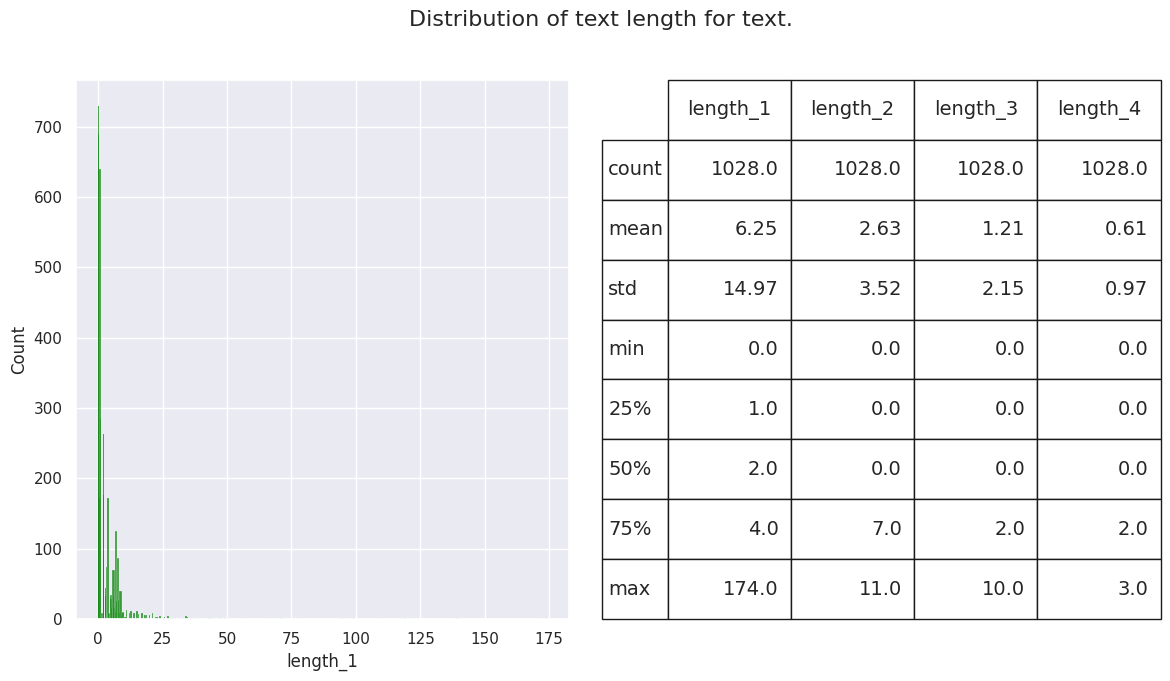

In [14]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 7))

# Calculate the length of each word in 'Unnamed: 0'
df['length_1'] = df['Unnamed: 0'].astype(str).apply(lambda x: len(x.split()))

# Calculate the length of each word in 'Description of the Grievance'
df['length_2'] = df['Description of the Grievance'].astype(str).apply(lambda x: len(x.split()))

# Calculate the length of each word in 'Unnamed: 2'
df['length_3'] = df['Unnamed: 2'].astype(str).apply(lambda x: len(x.split()))

# Calculate the length of each word in 'Grievance Category'
df['length_4'] = df['Grievance Category'].astype(str).apply(lambda x: len(x.split()))

# Plot histograms
sns.histplot(df['length_1'], ax=ax1, color='green')
sns.histplot(df['length_2'], ax=ax1, color='green')
sns.histplot(df['length_3'], ax=ax1, color='green')
sns.histplot(df['length_4'], ax=ax1, color='green')

# Display statistics in a table
describe = df[['length_1', 'length_2', 'length_3', 'length_4']].describe().round(2)
ax2.axis('off')
font_size = 14
bbox = [0, 0, 1, 1]
table = ax2.table(cellText=describe.values, rowLabels=describe.index, bbox=bbox, colLabels=describe.columns)
table.set_fontsize(font_size)

fig.suptitle('Distribution of text length for text.', fontsize=16)

plt.show()


<Axes: xlabel='Grievance Category', ylabel='count'>

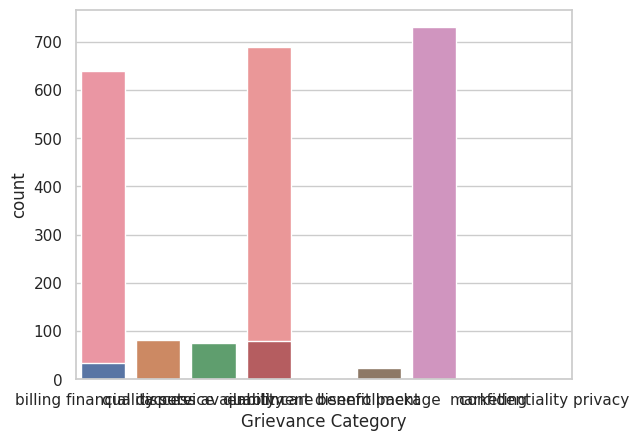

In [17]:
sns.set_theme(style="whitegrid")
sns.countplot(x=df["Unnamed: 0"])
sns.countplot(x=df["Description of the Grievance"])
sns.countplot(x=df["Unnamed: 2"])
sns.countplot(x=df["Grievance Category"])


In [18]:
top1 = Counter([item for sublist in df['short_word_1'] for item in sublist])
temp = pd.DataFrame(top1.most_common(20))
temp.columns = ['Common_words','count']
fig = px.bar(temp, x="count", y="Common_words", title='Commmon Words in Selected Text', orientation='h',
             width=700, height=700,color='Common_words')
fig.show()

In [23]:
member_text = df[df['Unnamed: 0']=='member']
pharmacy_text = df[df['Unnamed: 0']=='pharmacy']
services_text = df[df['Unnamed: 0']=='services']
satisfied_text = df[df['Unnamed: 0']=='satisfied']
dissatisfaction_text = df[df['Unnamed: 0']=='dissatisfaction']

In [32]:
top1 = Counter([item for sublist in dissatisfaction_text['short_word_1'] for item in sublist])
temp_positive = pd.DataFrame(top1.most_common(20),columns=['Common_words', 'count'])

fig = px.bar(temp_positive, x="count", y="Common_words", title='Most Commmon Words in dissatisfaction_text', orientation='h',
             width=700, height=700,color='Common_words')
fig.show()

In [19]:
top2 = Counter([item for sublist in df['short_word_2'] for item in sublist])
temp = pd.DataFrame(top2.most_common(20))
temp.columns = ['Common_words','count']
fig = px.bar(temp, x="count", y="Common_words", title='Commmon Words in Selected Text', orientation='h',
             width=700, height=700,color='Common_words')
fig.show()

In [24]:
received_text = df[df['Description of the Grievance']=='received']
not_text = df[df['Description of the Grievance']=='not']
care_text = df[df['Description of the Grievance']=='care']
member_text = df[df['Description of the Grievance']=='member']
quality_text = df[df['Description of the Grievance']=='quality']

In [35]:
top2 = Counter([item for sublist in received_text['short_word_2'] for item in sublist])
temp_positive = pd.DataFrame(top2.most_common(20),columns=['Common_words', 'count'])

fig = px.bar(temp_positive, x="count", y="Common_words", title='Most Commmon Words in received_text', orientation='h',
             width=700, height=700,color='Common_words')
fig.show()

In [22]:
top3 = Counter([item for sublist in df['short_word_3'] for item in sublist])
temp = pd.DataFrame(top3.most_common(20))
temp.columns = ['Common_words','count']
fig = px.bar(temp, x="count", y="Common_words", title='Commmon Words in Selected Text', orientation='h',
             width=700, height=700,color='Common_words')
fig.show()

In [25]:
quality_text = df[df['Unnamed: 2']=='quality']
care_text = df[df['Unnamed: 2']=='care']
service_text = df[df['Unnamed: 2']=='service']
access_text = df[df['Unnamed: 2']=='access']
dissatisfaction_text = df[df['Unnamed: 2']=='dissatisfaction']

In [36]:
top3 = Counter([item for sublist in service_text['short_word_3'] for item in sublist])
temp_positive = pd.DataFrame(top3.most_common(20),columns=['Common_words', 'count'])

fig = px.bar(temp_positive, x="count", y="Common_words", title='Most Commmon Words in service_text ', orientation='h',
             width=700, height=700,color='Common_words')
fig.show()

In [21]:
top4 = Counter([item for sublist in df['short_word_4'] for item in sublist])
temp = pd.DataFrame(top4.most_common(20))
temp.columns = ['Common_words','count']
fig = px.bar(temp, x="count", y="Common_words", title='Commmon Words in Selected Text', orientation='h',
             width=700, height=700,color='Common_words')
fig.show()

In [26]:
quality_text = df[df['Grievance Category']=='quality']
care_text = df[df['Grievance Category']=='care']
service_text = df[df['Grievance Category']=='service']
access_text = df[df['Grievance Category']=='access']
availability_text = df[df['Grievance Category']=='availability']

In [31]:
top4 = Counter([item for sublist in quality_text['short_word_4'] for item in sublist])
temp_positive = pd.DataFrame(top4.most_common(20),columns=['Common_words', 'count'])

fig = px.bar(temp_positive, x="count", y="Common_words", title='Most Commmon Words in quality_text', orientation='h',
             width=700, height=700,color='Common_words')
fig.show()

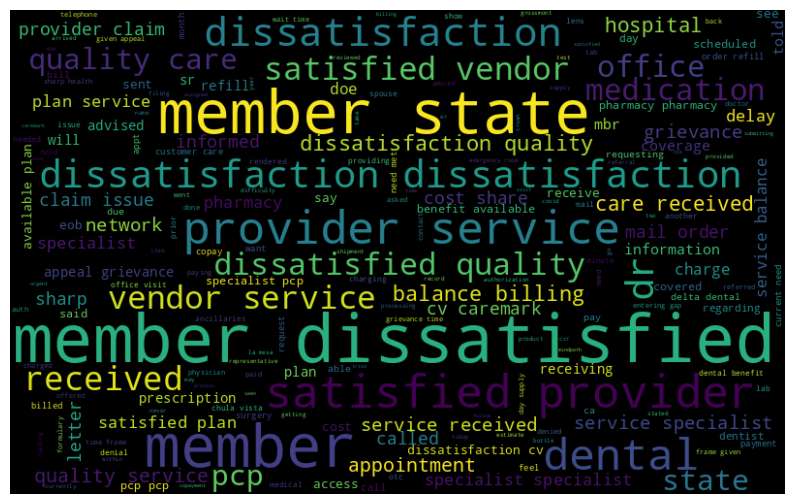

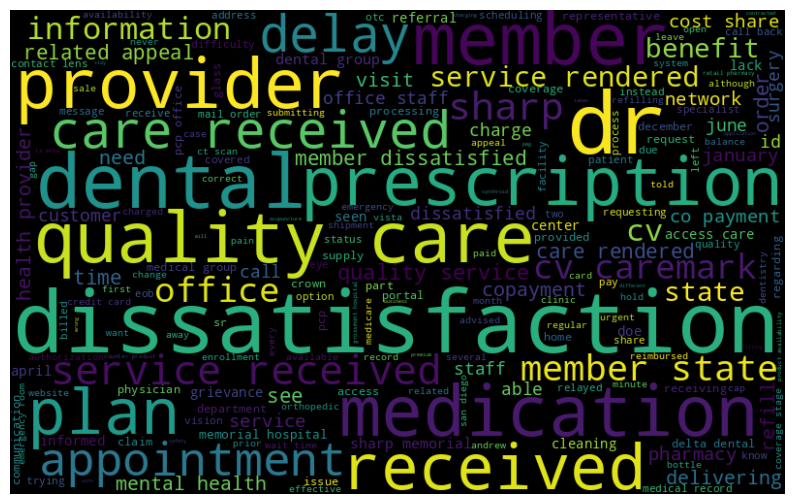

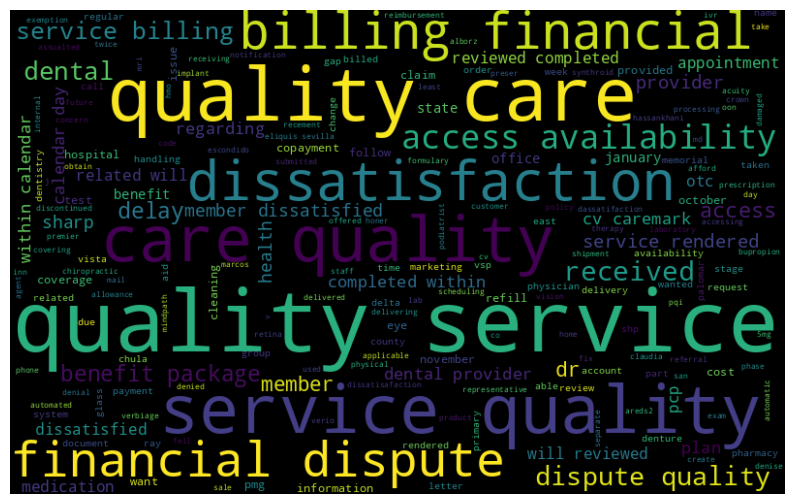

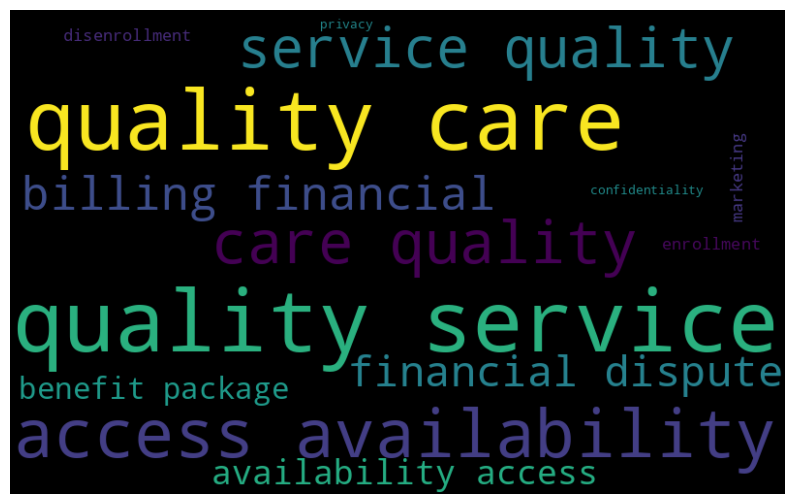

In [40]:
normal_words_1 =' '.join([text for text in df['Unnamed: 0']])
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(normal_words_1)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

normal_words_2 =' '.join([text for text in df['Description of the Grievance']])
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(normal_words_2)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

normal_words_3 =' '.join([text for text in df['Unnamed: 2']])
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(normal_words_3)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

normal_words_4 =' '.join([text for text in df['Grievance Category']])
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(normal_words_4)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

#APPLYING N GRAM :

In [ ]:
"Unnamed: 0"])
sns.countplot(x=df["Description of the Grievance"])
sns.countplot(x=df["Unnamed: 2"])
sns.countplot(x=df["Grievance Category"])

In [42]:
x_train, x_test, y_train, y_test = train_test_split(df["Unnamed: 0"],df["Description of the Grievance"],test_size = 0.25, random_state = 42)
count_vect = CountVectorizer(ngram_range=(1, 2))
transformer = TfidfTransformer(norm='l2',sublinear_tf=True)
x_train_counts = count_vect.fit_transform(x_train)
x_train_tfidf = transformer.fit_transform(x_train_counts)

x_test_counts = count_vect.transform(x_test)
x_test_tfidf = transformer.transform(x_test_counts)

print (x_train_tfidf.shape,x_test_tfidf.shape, y_train.shape, y_test.shape)

(771, 3731) (257, 3731) (771,) (257,)


In [43]:
joblib.dump(count_vect, 'count_vect.pkl')
#model = joblib.load('count_vect.pkl')

['count_vect.pkl']

#MACHINE LEARNING MODELS:

Logistic Regression

In [44]:
lr = LogisticRegression(C = 2, max_iter = 1000, n_jobs=-1)
lr.fit(x_train_tfidf, y_train)
y_pred1 = lr.predict(x_test_tfidf)
print("Accuracy: "+str(accuracy_score(y_test,y_pred1)))
print(classification_report(y_test, y_pred1))

Accuracy: 0.603112840466926
                                                                   precision    recall  f1-score   support

                                                                        0.60      1.00      0.75       155
       10 office visit copayment related appeal postc_2023_000300       0.00      0.00      0.00         1
                         15 2022 office dr david andrew bridgeman       0.00      0.00      0.00         1
                    30 allowed visit will not able seen july 2023       0.00      0.00      0.00         1
                        30 degree temperature should 36 46 degree       0.00      0.00      0.00         1
            acupuncture benefit plan customer care representative       0.00      0.00      0.00         1
              amount show he state eobs provide basic information       0.00      0.00      0.00         1
                 ashlink com sharp health plan website misleading       0.00      0.00      0.00         1
        

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



In [45]:
mc = count_vect.transform(["howard hits back at mongrel jibe michael howard has said a claim by peter hain that the tory leader is acting like an attack mongrel shows labour is rattled by the opposition. in an upbeat speech to his party s spring conference in brighton he said labour s campaigning tactics proved the tories were hitting home. mr hain made the claim about tory tactics in the anti-terror bill debate. something tells me that someone somewhere out there is just a little bit rattled mr howard said. mr hain leader of the commons told bbc radio four s today programme that mr howard s stance on the government s anti-terrorism legislation was putting the country at risk. he then accused the tory leader of behaving like an attack mongrel and playing opposition for opposition sake . mr howard told his party that labour would do anything say anything claim anything to cling on to office at all costs . so far this year they have compared me to fagin to shylock and to a flying pig. this morning peter hain even called me a mongrel. i don t know about you but something tells me that someone somewhere out there is just a little bit rattled. environment secretary margaret beckett rejected mr howard s comment telling radio 4 s pm programme that labour was not rattled . we have a very real duty to try to get people to focus on michael howard s record what the proposals are that he is trying to put forward to the country and also the many examples we are seeing now of what we believe is really poor judgement on his behalf. mr howard said tory policies on schools taxes immigration and crime were striking a chord with voters. since the beginning of this year - election year - we ve been making the political weather he told the party conference. mr howard denied he had been playing politics by raising the case of margaret dixon whose operation had been cancelled seven times which grabbed headlines for the party two weeks ago. and he hit back at labour claims he had used mrs dixon as a human shield . she s not a human shield mr blair she s a human being. mr howard said his party plans for immigration quotas which have also been the focus of much media coverage were not racist - just common sense . he pledged cleaner hospitals and better school discipline with a promise to get rid of political correctness in the national curriculum and give everyone to the same chance of a decent state education as he had. i come from an ordinary family. if the teenage michael howard were applying to cambridge today gordon brown would love me. and he stressed his party s commitment to cut taxes and red tape and increase the basic state pension in line with earnings. he finished with a personal appeal to party activists to go out and win the next election. one day you will be able to tell your children and grandchildren as i will tell mine i was there. i did my bit. i played my part. i helped to win that famous election - the election that transformed our country for the better . labour election co-ordinator alan milburn said: michael howard s speech today confirms what we have always said - that his only strategy is opportunism but he has no forward vision for the country. in reference to the appearance of mr howard s family on the conference stage with him mr milburn said: michael howard is perfectly entitled to pose with his family today. but it is the hard working families across britain that will be damaged by his plan to cut £35bn from public spending."])
m = transformer.transform(mc)
y_pred = lr.predict(m)
print(y_pred)

['']


In [46]:
scores = cross_val_score(lr, x_train_tfidf,y_train, cv=10)
print(accuracy_score(y_test,y_pred1))
print ("Cross-validated scores:", scores)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning:

The least populated class in y has only 1 members, which is less than n_splits=10.



0.603112840466926
Cross-validated scores: [0.62820513 0.63636364 0.63636364 0.63636364 0.63636364 0.62337662
 0.62337662 0.62337662 0.62337662 0.62337662]


In [47]:
joblib.dump(lr, 'Text_LR.pkl')
#model = joblib.load('Text_LR.pkl')

['Text_LR.pkl']

Support vector machine:

In [48]:
svc = LinearSVC()
svc.fit(x_train_tfidf, y_train)
y_pred2 = svc.predict(x_test_tfidf)
print("Accuracy: "+str(accuracy_score(y_test,y_pred2)))
print(classification_report(y_test, y_pred2))

Accuracy: 0.6070038910505836
                                                                   precision    recall  f1-score   support

                                                                        0.67      0.99      0.80       155
       10 office visit copayment related appeal postc_2023_000300       0.00      0.00      0.00         1
                         15 2022 office dr david andrew bridgeman       0.00      0.00      0.00         1
            28 2022 sharp chula vista imaging center office staff       0.00      0.00      0.00         0
                    30 allowed visit will not able seen july 2023       0.00      0.00      0.00         1
                        30 degree temperature should 36 46 degree       0.00      0.00      0.00         1
       access care mental health provider within mindpath network       0.00      0.00      0.00         0
            acupuncture benefit plan customer care representative       0.00      0.00      0.00         1
       

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to cont

In [63]:
mc = count_vect.transform(["taken forwarded dermatology review he need referral"])
m = transformer.transform(mc)
y_pred = svc.predict(m)
print(y_pred)

['']


In [ ]:
svc = LinearSVC()
svc.fit(x_train_tfidf, y_train)
y_pred2 = svc.predict(x_test_tfidf)
print("Accuracy: "+str(accuracy_score(y_test,y_pred2)))
print(classification_report(y_test, y_pred2))

Accuracy: 0.6070038910505836
                                                                   precision    recall  f1-score   support

                                                                        0.67      0.99      0.80       155
       10 office visit copayment related appeal postc_2023_000300       0.00      0.00      0.00         1
                         15 2022 office dr david andrew bridgeman       0.00      0.00      0.00         1
            28 2022 sharp chula vista imaging center office staff       0.00      0.00      0.00         0
                    30 allowed visit will not able seen july 2023       0.00      0.00      0.00         1
                        30 degree temperature should 36 46 degree       0.00      0.00      0.00         1
       access care mental health provider within mindpath network       0.00      0.00      0.00         0
            acupuncture benefit plan customer care representative       0.00      0.00      0.00         1
       

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to cont

In [50]:
scores = cross_val_score(svc, x_train_tfidf,y_train, cv=10)
print(accuracy_score(y_test,y_pred2))
print ("Cross-validated scores:", scores)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning:

The least populated class in y has only 1 members, which is less than n_splits=10.



0.6070038910505836
Cross-validated scores: [0.61538462 0.62337662 0.62337662 0.63636364 0.62337662 0.62337662
 0.62337662 0.62337662 0.62337662 0.62337662]


In [51]:
joblib.dump(svc, 'Text_SVM.pkl')
#model = joblib.load('Text_SVM.pkl')

['Text_SVM.pkl']

Naive Bayes (MULTINOMINAL)

In [52]:
mnb = MultinomialNB()
mnb.fit(x_train_tfidf, y_train)
y_pred3 = mnb.predict(x_test_tfidf)
print("Accuracy: "+str(accuracy_score(y_test,y_pred3)))
print(classification_report(y_test, y_pred3))

Accuracy: 0.603112840466926
                                                                   precision    recall  f1-score   support

                                                                        0.60      1.00      0.75       155
       10 office visit copayment related appeal postc_2023_000300       0.00      0.00      0.00         1
                         15 2022 office dr david andrew bridgeman       0.00      0.00      0.00         1
                    30 allowed visit will not able seen july 2023       0.00      0.00      0.00         1
                        30 degree temperature should 36 46 degree       0.00      0.00      0.00         1
            acupuncture benefit plan customer care representative       0.00      0.00      0.00         1
              amount show he state eobs provide basic information       0.00      0.00      0.00         1
                 ashlink com sharp health plan website misleading       0.00      0.00      0.00         1
        

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



In [62]:
mc = count_vect.transform(["strength open safety cap applied medicine bottle"])
m = transformer.transform(mc)
y_pred = mnb.predict(m)
print(y_pred)

['']


In [54]:
scores = cross_val_score(mnb, x_train_tfidf,y_train, cv=10)
print(accuracy_score(y_test,y_pred3))
print ("Cross-validated scores:", scores)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning:

The least populated class in y has only 1 members, which is less than n_splits=10.



0.603112840466926
Cross-validated scores: [0.62820513 0.63636364 0.63636364 0.63636364 0.63636364 0.62337662
 0.62337662 0.62337662 0.62337662 0.62337662]


## **Randomforest**


In [57]:
rfc = RandomForestClassifier(n_estimators=300, max_depth=15, random_state=42, class_weight='balanced')
rfc.fit(x_train_tfidf,y_train)
y_pred4 = rfc.predict(x_test_tfidf)
print("Accuracy: "+str(accuracy_score(y_test,y_pred4)))
print(classification_report(y_test, y_pred4))

Accuracy: 0.40077821011673154
                                                                   precision    recall  f1-score   support

                                                                        0.93      0.65      0.77       155
                 10 22 crown received 28 2022 poway family dental       0.00      0.00      0.00         0
       10 office visit copayment related appeal postc_2023_000300       0.00      0.00      0.00         1
          12 2022 related diagnosis obsessive compulsive disorder       0.00      0.00      0.00         0
                         15 2022 office dr david andrew bridgeman       0.00      0.00      0.00         1
            28 2022 sharp chula vista imaging center office staff       0.00      0.00      0.00         0
                    30 allowed visit will not able seen july 2023       0.00      0.00      0.00         1
                        30 degree temperature should 36 46 degree       0.00      0.00      0.00         1
      

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to cont

In [60]:
mc = count_vect.transform(["stopped member relayed contact should covered medically"])
m = transformer.transform(mc)
y_pred = rfc.predict(m)
print(y_pred)

['vision benefit member sates she not appealing charge']


In [59]:
scores = cross_val_score(rfc, x_train_tfidf,y_train, cv=10)
print(accuracy_score(y_test,y_pred4))
print ("Cross-validated scores:", scores)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning:

The least populated class in y has only 1 members, which is less than n_splits=10.



0.40077821011673154
Cross-validated scores: [0.30769231 0.31168831 0.35064935 0.38961039 0.50649351 0.37662338
 0.46753247 0.36363636 0.35064935 0.32467532]
